In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
# Loading the Data
path = r"C:\Users\USER\Desktop\Cube\Data_Science\Project\Titanic\data"
os.chdir(path)

df = pd.read_csv("titanic_cleaned.csv")


In [5]:
# Dropping an unnecesesary column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
# Mapping 0 & 1 with values
df['Survived'] = df['Survived'].astype(int).map({0: 'Died', 1: 'Survived'})

In [7]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
69,70,Died,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,S


# Visualization

In [8]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

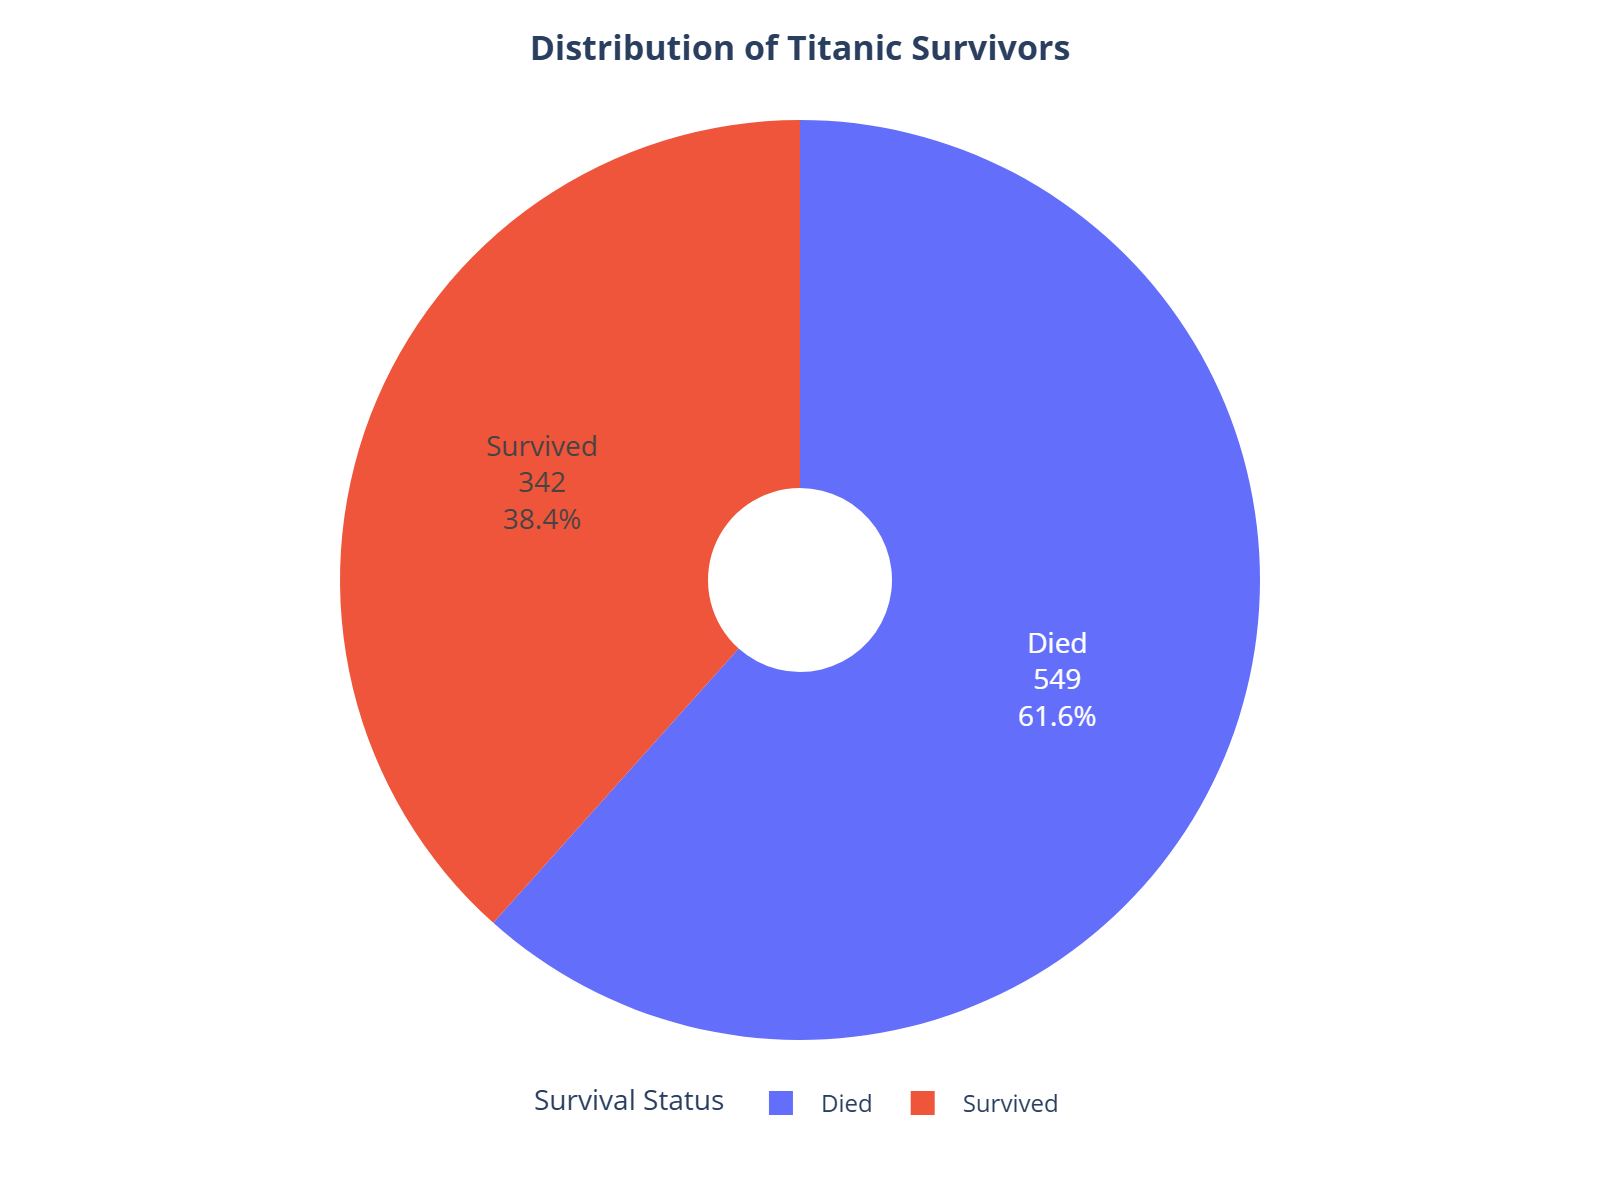

In [9]:
# Visualizing the distribution os the Survivors (0=Died, 1=Survived)

survived_dist= df['Survived'].value_counts().reset_index()

survived_dist.columns = ['Survived', 'Count']

fig = px.pie(
    values=survived_dist['Count'],
    
    hole=0.2,
    names=survived_dist['Survived']
)
fig.update_traces(textinfo='text+percent+label+value', textfont_size=14)
fig.update_layout(
    title_text='<b>Distribution of Titanic Survivors</b>',
    title_x=0.5,  # center title
    legend_title='Survival Status',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.1,
        xanchor="center",
        x=0.5
    )
)

fig.show('png', height=600, width=800, scale=2)

### Survived insights
**Died (0)**- Majority of the people in the Titanic died 549(62%)

**Survived (1)**- Only 342 People survived

C:\Users\USER\AppData\Local\Temp\ipykernel_13084\3352559931.py:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



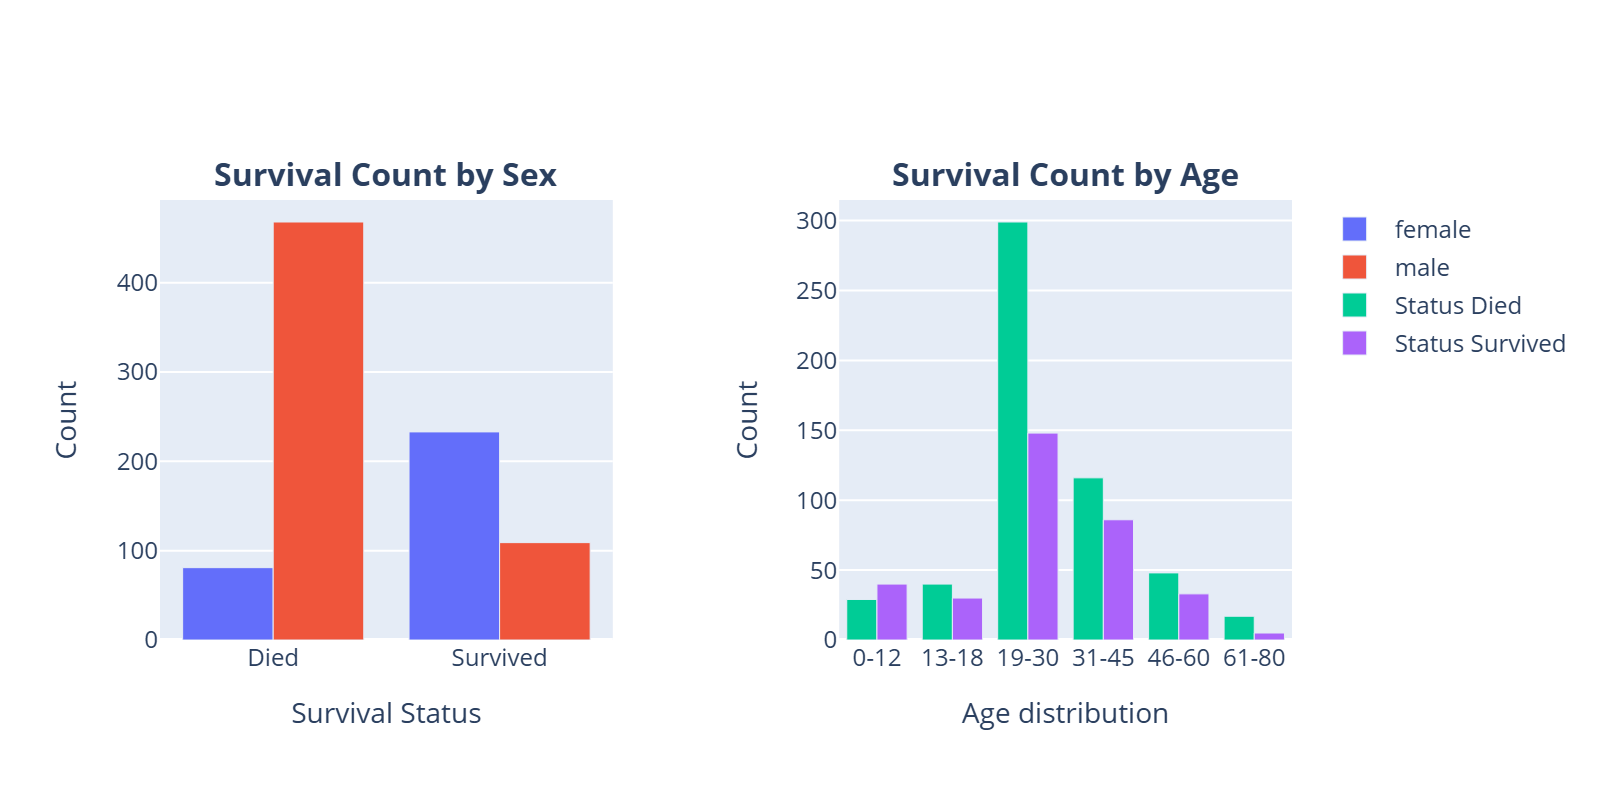

In [14]:
# Visualizing Survived with other features

fig = go.Figure()
fig = make_subplots(
    rows=1, cols=2,
    horizontal_spacing=0.2,
    subplot_titles=['<b>Survival Count by Sex</b>', '<b>Survival Count by Age</b>'],
    specs=[[{'type':'xy'}, {'type':'xy'}]]
)
grouped = df.groupby(['Survived','Sex']).size().reset_index(name='Count')
for sex in grouped['Sex'].unique():
    subset= grouped[grouped['Sex']== sex]
    fig.add_trace(
        go.Bar(
            x=subset['Survived'],
            y=subset['Count'],
            name=sex
        ), row=1, col=1
    )

df['Age_group'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 45, 60, 80], labels=['0-12', '13-18', '19-30', '31-45', '46-60', '61-80'])
grouped1 = df.groupby(['Survived','Age_group']).size().reset_index(name='Count')
for surv in grouped1['Survived'].unique():
    subset1 = grouped1[grouped1['Survived'] == surv]
    fig.add_trace(
        go.Bar(
            x=subset1['Age_group'].astype(str),
            y=subset1['Count'],
            name=f"Status {surv}"
        ),
        row=1, col=2
    )

fig.update_xaxes(title_text='Survival Status', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_xaxes(title_text='Age distribution ', row=1, col=2)
fig.update_yaxes(title_text='Count', row=1, col=2)

fig.show('png', height=400, width=800, scale=2)


###  **Survival Count by Sex**
- 🔵 **Females** had a **much higher survival rate** compared to males.
- 🔴 **Males** experienced the **highest number of deaths**.
- Supports the historical principle of "**women and children first**" during evacuation.

### **Survival Count by Age**
- 🟩 **Passengers aged 19–30** were the most numerous but had the **highest death count**.
- 🟪 **Children (0–12)** had a **higher chance of survival** than older groups.
- **Older adults (46+)** had **lower survival rates**, with more deaths than survivals.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    object  
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
 11  Age_group    891 non-null    category
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.8+ KB


### Survival Count by Sex insights
**Died** More males died (468) compared to females.Only (81)females died

**Survived** More females survived (233), and males (109)
* This can suggest that females were given a priority on lifeboats which made a majority to get saved

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,19-30
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,31-45
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,19-30
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,31-45
4,5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,31-45


In [13]:
grouped = df.groupby(['Survived','Age']).size().reset_index(name='Count')
grouped

,Survived,Age,Count
0,Died,1.0,2
1,Died,2.0,7
2,Died,3.0,1
3,Died,4.0,3
4,Died,6.0,1
...,...,...,...
137,Survived,58.0,3
138,Survived,60.0,2
139,Survived,62.0,2
140,Survived,63.0,2
